IMPORTING REQUIRED LIBRARIES

In [102]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


LOAD THE DATASET

In [103]:
data = pd.read_csv('BTC-USD.csv')

ANALYSIS OF DATA

In [104]:
data.sample(6)

,Date,Open,High,Low,Close,Adj Close,Volume
229,2015-05-04,240.356003,242.638000,237.809998,239.018005,239.018005,21223400
617,2016-05-26,449.671997,453.644012,447.895996,453.384003,453.384003,65203800
1234,2018-02-02,9142.280273,9142.280273,7796.490234,8830.750000,8830.750000,12726899712
744,2016-09-30,605.715027,609.734985,604.142029,609.734985,609.734985,56122400
261,2015-06-05,224.154007,225.968002,223.179001,224.951996,224.951996,18056500
62,2014-11-18,387.785004,392.402008,371.117004,375.197998,375.197998,32222500


In [105]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


In [107]:
data.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2708,False,False,False,False,False,False,False
2709,False,False,False,False,False,False,False
2710,False,False,False,False,False,False,False
2711,False,False,False,False,False,False,False


In [108]:
data.isnull().values.any()

False

In [109]:
data['Date'] = pd.to_datetime(data['Date'], errors = 'coerce', dayfirst = True)

/var/folders/x7/kgfdd_ss2rz7sc7k1737rdn80000gp/T/ipykernel_1496/2029903605.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'], errors = 'coerce', dayfirst = True)


In [110]:
data = data[['Date', 'Open', 'High', 'Low', 'Volume', 'Close']]

In [111]:
data.head(5)

,Date,Open,High,Low,Volume,Close
0,2014-09-17,465.864014,468.174011,452.421997,21056800,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,34483200,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,37919700,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,36863600,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,26580100,398.821014


DATA VISUALISATION

<function matplotlib.pyplot.show(close=None, block=None)>

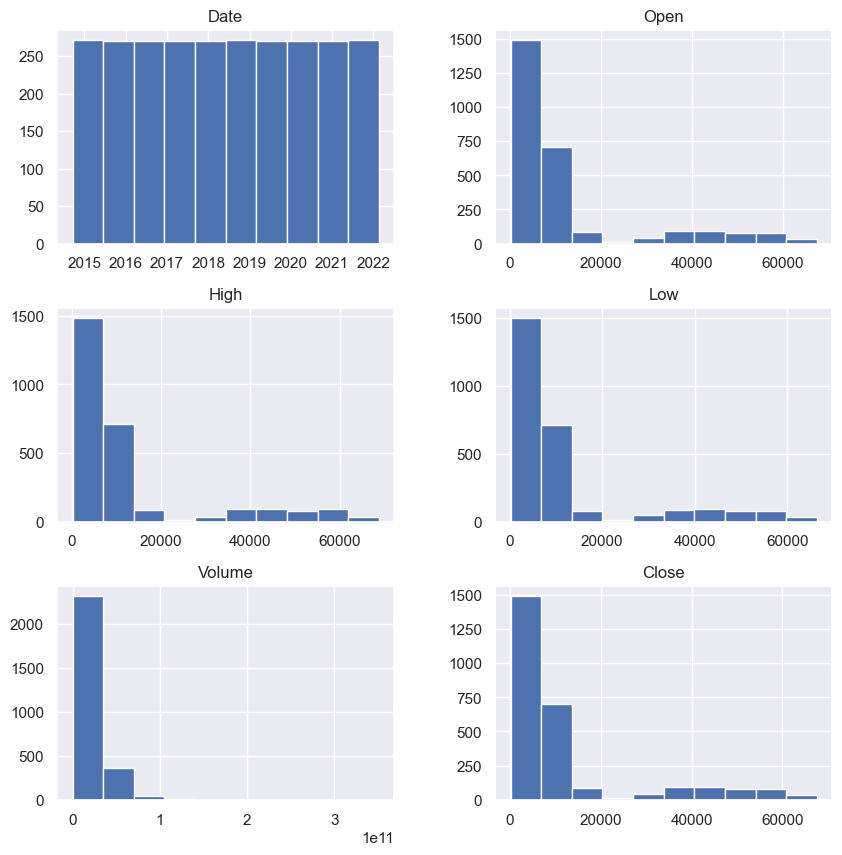

In [112]:
data.hist(bins=10,figsize=(10,10))
plt.show

<Axes: xlabel='Date'>

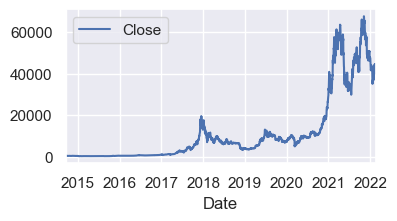

In [113]:
data.plot(x = 'Date', y = 'Close')

<Axes: >

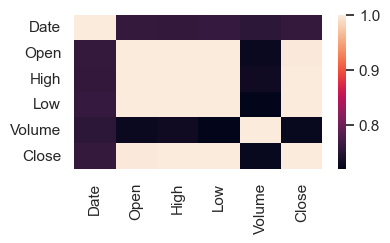

In [114]:
sns.heatmap(data.corr())

<Axes: >

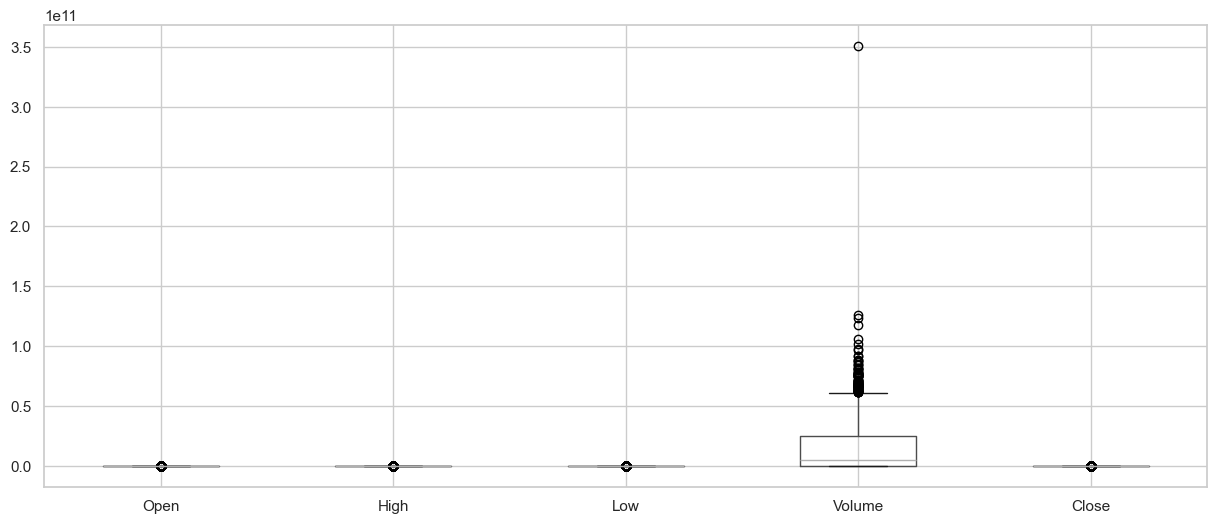

In [115]:
sns.set(style="whitegrid")
data.boxplot(figsize=(15,6))

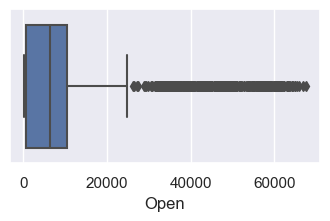

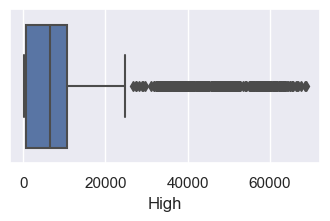

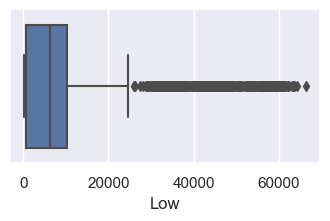

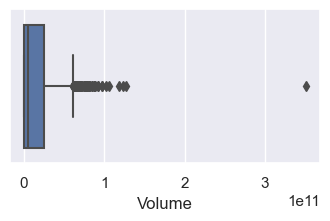

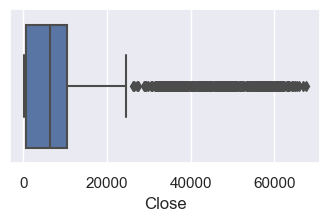

In [116]:
#box plot
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=data['Open'])
plt.show()
sns.boxplot(x=data['High'])
plt.show()
sns.boxplot(x=data['Low'])
plt.show()
sns.boxplot(x=data['Volume'])
plt.show()
sns.boxplot(x=data['Close'])
plt.show()

In [117]:
#outlier remove

Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

---Q1--- 
 Date      2016-07-26 00:00:00
Open               606.396973
High               609.260986
Low                604.109985
Volume             79910800.0
Close              606.718994
Name: 0.25, dtype: object

---Q3--- 
 Date      2020-04-12 00:00:00
Open             10452.399414
High             10762.644531
Low              10202.387695
Volume          24569921549.0
Close            10462.259766
Name: 0.75, dtype: object

---IQR---
 Date      1356 days 00:00:00
Open             9846.002441
High            10153.383545
Low               9598.27771
Volume         24490010749.0
Close            9855.540772
dtype: object


In [118]:
#outlier remove
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape,data_out.shape

((2713, 6), (2285, 6))

In [119]:
data['Date'].min(), data['Date'].max()

(Timestamp('2014-09-17 00:00:00'), Timestamp('2022-02-19 00:00:00'))

SPLITTING THE DATA INTO TEST AND TRAIN SET

In [120]:
train_data = data.loc[data['Date'] < '2020-09-01'].copy()
test_data = data.loc[data['Date'] >= '2020-09-01'].copy()

In [121]:
print('Train Data Shape: ', train_data.shape)
print('Test Data Shape: ', test_data.shape)

Train Data Shape:  (2176, 6)
Test Data Shape:  (537, 6)


MODEL BUILDING

In [143]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [144]:
train_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Volume', 'Close'], dtype='object')

FITTING THE MODEL

In [145]:
predictors = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

regression.fit(train_data[predictors], train_data[target])

LinearRegression()

In [146]:
regression.score(train_data[predictors], train_data[target])

0.9993745607069814

In [147]:
Predictions = regression.predict(test_data[predictors])

In [148]:
test_data

,Date,Open,High,Low,Volume,Close,Prediction,Error
2176,2020-09-01,11679.316406,12067.081055,11601.128906,27311555343,11970.478516,11929.445250,41.033266
2177,2020-09-02,11964.823242,11964.823242,11290.793945,28037405299,11414.034180,11477.332687,-63.298507
2178,2020-09-03,11407.191406,11443.022461,10182.464844,31927261555,10245.296875,10584.204673,-338.907798
2179,2020-09-04,10230.365234,10663.919922,10207.940430,29965130374,10511.813477,10559.495448,-47.681971
2180,2020-09-05,10512.530273,10581.571289,9946.675781,44916565292,10169.567383,10152.612231,16.955152
...,...,...,...,...,...,...,...,...
2708,2022-02-15,42586.464844,44667.218750,42491.035156,22721659051,44575.203125,44250.218921,324.984204
2709,2022-02-16,44578.277344,44578.277344,43456.691406,19792547657,43961.859375,43730.216666,231.642709
2710,2022-02-17,43937.070313,44132.972656,40249.371094,26246662813,40538.011719,41552.577776,-1014.566057
2711,2022-02-18,40552.132813,40929.152344,39637.617188,23310007704,40030.976563,40179.353953,-148.377390


In [149]:
test_data['Prediction'] = Predictions

In [150]:
error = test_data['Close'] - test_data['Prediction']

In [151]:
test_data.tail(10)

,Date,Open,High,Low,Volume,Close,Prediction,Error
2703,2022-02-10,44347.800781,45661.171875,43402.808594,32142048537,43565.113281,44764.812744,-1199.699463
2704,2022-02-11,43571.128906,43810.832031,42114.539063,26954925781,42407.937500,42709.377899,-301.440399
2705,2022-02-12,42412.300781,42992.550781,41852.574219,18152390304,42244.468750,42452.518188,-208.049438
2706,2022-02-13,42236.566406,42693.054688,41950.941406,14741589015,42197.515625,42352.404961,-154.889336
2707,2022-02-14,42157.398438,42775.777344,41681.957031,20827783012,42586.917969,42286.405788,300.512181
2708,2022-02-15,42586.464844,44667.218750,42491.035156,22721659051,44575.203125,44250.218921,324.984204
2709,2022-02-16,44578.277344,44578.277344,43456.691406,19792547657,43961.859375,43730.216666,231.642709
2710,2022-02-17,43937.070313,44132.972656,40249.371094,26246662813,40538.011719,41552.577776,-1014.566057
2711,2022-02-18,40552.132813,40929.152344,39637.617188,23310007704,40030.976563,40179.353953,-148.377390
2712,2022-02-19,40022.132813,40246.027344,40010.867188,22263900160,40126.429688,40117.245147,9.184541


In [152]:
test_data['Error'] = error

In [153]:
test_data.tail(5)

,Date,Open,High,Low,Volume,Close,Prediction,Error
2708,2022-02-15,42586.464844,44667.218750,42491.035156,22721659051,44575.203125,44250.218921,324.984204
2709,2022-02-16,44578.277344,44578.277344,43456.691406,19792547657,43961.859375,43730.216666,231.642709
2710,2022-02-17,43937.070313,44132.972656,40249.371094,26246662813,40538.011719,41552.577776,-1014.566057
2711,2022-02-18,40552.132813,40929.152344,39637.617188,23310007704,40030.976563,40179.353953,-148.377390
2712,2022-02-19,40022.132813,40246.027344,40010.867188,22263900160,40126.429688,40117.245147,9.184541


In [154]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('Mean Absolute Error: ', mean_absolute_error(test_data['Close'], test_data['Prediction']))
print('Mean Squared Error: ', mean_squared_error(test_data['Close'], test_data['Prediction']))

Mean Absolute Error:  490.72621321820253
Mean Squared Error:  495287.74853295804


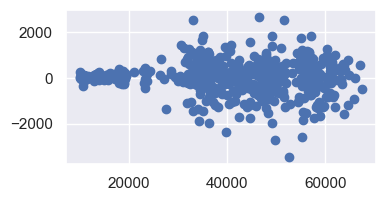

In [155]:
plt.scatter(test_data['Prediction'], error)

CLASSIFICATION

In [156]:
from sklearn.ensemble import RandomForestClassifier


In [157]:
# Feature engineering
# Let's create some basic features for demonstration purposes
data['PriceChange'] = data['Close'] - data['Open']
data['PriceDirection'] = (data['PriceChange'] > 0).astype(int)  # 1 if price went up, 0 if price went down

In [158]:
# Select features
features = ['Volume', 'PriceChange'] 

In [159]:
# Split data into train and test sets
X = data[features]
y = data['PriceDirection']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [161]:
# Make predictions
predictions = model.predict(X_test)

In [162]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.998158379373849
